#Spaceship Titanic Project

[Spaceship Titanic Kaggle](https://www.kaggle.com/competitions/spaceship-titanic)

##Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [6]:
df_train = pd.read_csv("train.csv", index_col = 0)

df_test = pd.read_csv("test.csv", index_col = 0)

In [7]:
print("TRAIN SET")
df_train

TRAIN SET


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [8]:
print("TEST SET")
df_test

TEST SET


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


all columns contain null values except "Transported"

In [10]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


In [12]:
#distribution of train set transported column
df_train['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


In [13]:
#unique home planet categories
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [14]:
#number of unique values for each column
df_train.nunique()

,0
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115
Spa,1327


In [15]:
#train set data types
df_train.dtypes

,0
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64


###Data Visualization

Text(0.5, 1.0, 'Target distribution')

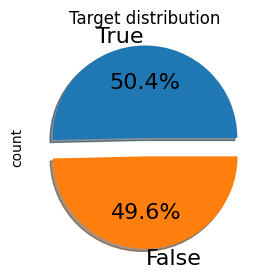

In [16]:
plt.figure(figsize=(3,3))
df_train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

There is a roughly 50-50 split between true and false outcomes for the transported column of the training data

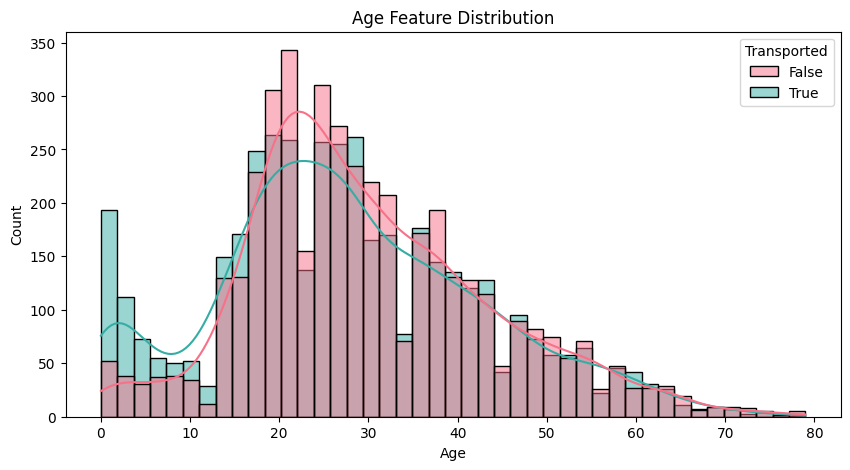

In [17]:
plt.figure(figsize = (10,5))
sns.histplot(x = df_train["Age"],hue="Transported",data = df_train,kde=True,palette= "husl")
plt.title("Age Feature Distribution");

The age distribution in the training data is roughly right skewed. Between the ages of 0 and 18, it appears that there is a higher chance of being transported compared to the ages over 18

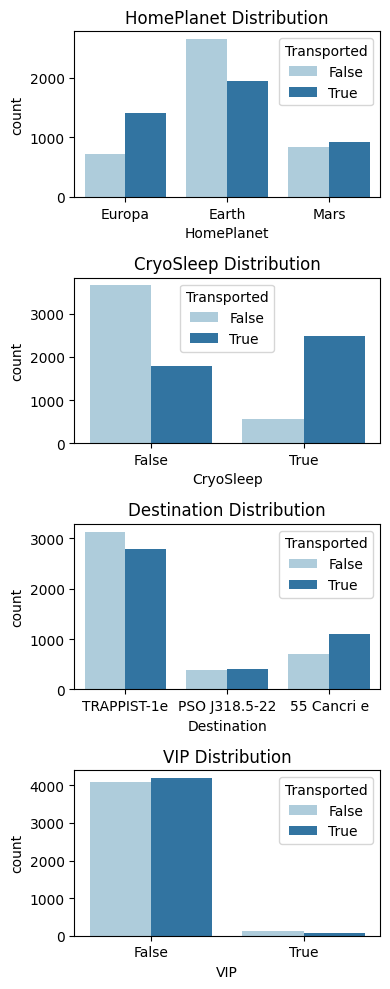

In [18]:
cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(4,10))
for idx,column in enumerate(cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=df_train, palette="Paired")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

For the home planet Mars, there is a close to equal likelihood of being transported or not transported. It appears that people who elect to go into CryoSleep have a higher likelihood of being transported.The distribution of VIP vs. transported suggests that VIP is may not be that useful for predicting transported as the distribution of transported vs. not transported for both VIP and non-VIP are roughly equal. However, there could be some other confounding variables that contribute to this distribution

The correlation heatmap (only for numerical columns) suggests that food court may have a stronger correlation with "Transported" compared to other features




##Data Processing and Cleaning

In [20]:
#print number of null values
print("TRAIN SET NULL VALUES:\n")
df_train.isnull().sum().sort_values(ascending=False)

TRAIN SET NULL VALUES:



,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182


In [21]:
print("TEST SET NULL VALUES:\n")
df_test.isnull().sum().sort_values(ascending=False)

TEST SET NULL VALUES:



,0
FoodCourt,106
Spa,101
Cabin,100
ShoppingMall,98
Name,94
VIP,93
CryoSleep,93
Destination,92
Age,91
HomePlanet,87


In [22]:
#drop 'Name' column
df_train.drop(columns = ['Name'],  inplace = True)
df_test.drop(columns = ['Name'],  inplace = True)

In [23]:
#split cabin by deck, side, and cabin numer
df_train[['Deck', 'CabinNum', 'Side']] = df_train['Cabin'].str.split("/", expand = True)
df_test[['Deck', 'CabinNum', 'Side']] = df_test['Cabin'].str.split("/", expand = True)

In [24]:
df_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296,P


In [25]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Side
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8494 non-null   object 
 13  CabinNum      8494 non-null   object 
 14  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 1.3+ MB


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Deck          4177 non-null   object 
 12  CabinNum      4177 non-null   object 
 13  Side          4177 non-null   object 
dtypes: float64(6), object(8)
memory usage: 501.2+ KB


In [28]:
#drop 'Cabin' and 'CabinNum' columns because too many unique values
df_train.drop(['CabinNum', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['CabinNum', 'Cabin'], axis = 1, inplace = True)

In [29]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S


In [30]:
#fill null values with median or mode
df_train['HomePlanet'].fillna(value='Earth', inplace=True)
df_train['CryoSleep'].fillna(value=False, inplace=True)
df_train['Destination'].fillna(value=df_train.Destination.mode(), inplace=True)
df_train['Age'].fillna(value=df_train.Age.median(), inplace=True)
df_train['VIP'].fillna(value=False, inplace=True)
df_train['RoomService'].fillna(value=df_train.RoomService.median(), inplace=True)
df_train['FoodCourt'].fillna(value=df_train.FoodCourt.median(), inplace=True)
df_train['ShoppingMall'].fillna(value=df_train.ShoppingMall.median(), inplace=True)
df_train['Spa'].fillna(value=df_train.Spa.median(), inplace=True)
df_train['VRDeck'].fillna(value=df_train.VRDeck.median(), inplace=True)
df_train['Deck'].fillna(value=df_train.Deck.mode(), inplace=True)
df_train['Side'].fillna(value=df_train.Side.mode(), inplace=True)

/tmp/ipython-input-4000066800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['HomePlanet'].fillna(value='Earth', inplace=True)
/tmp/ipython-input-4000066800.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [31]:
df_test['HomePlanet'].fillna(value='Earth', inplace=True)
df_test['CryoSleep'].fillna(value=False, inplace=True)
df_test['Destination'].fillna(value=df_train.Destination.mode(), inplace=True)
df_test['Age'].fillna(value=df_train.Age.median(), inplace=True)
df_test['VIP'].fillna(value=False, inplace=True)
df_test['RoomService'].fillna(value=df_train.RoomService.median(), inplace=True)
df_test['FoodCourt'].fillna(value=df_train.FoodCourt.median(), inplace=True)
df_test['ShoppingMall'].fillna(value=df_train.ShoppingMall.median(), inplace=True)
df_test['Spa'].fillna(value=df_train.Spa.median(), inplace=True)
df_test['VRDeck'].fillna(value=df_train.VRDeck.median(), inplace=True)
df_test['Deck'].fillna(value=df_test.Deck.mode(), inplace=True)
df_test['Side'].fillna(value=df_test.Side.mode(), inplace=True)

/tmp/ipython-input-1457269213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['HomePlanet'].fillna(value='Earth', inplace=True)
/tmp/ipython-input-1457269213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [32]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S


In [33]:
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,S
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN
9271_01,Mars,True,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,D,P


One-hot Encoding

https://www.geeksforgeeks.org/python-pandas-get_dummies-method/



In [34]:
#convert non numeric categorical columns to numeric using one-hot encoding
df_train = pd.get_dummies(df_train, columns=['HomePlanet', 'Destination', 'VIP', 'Side', 'Deck'])
df_test = pd.get_dummies(df_test, columns=['HomePlanet', 'Destination', 'VIP', 'Side', 'Deck'])

In [35]:
df_train

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,...,True,False,False,True,False,False,False,False,False,False
0002_01,False,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,...,False,True,False,False,False,False,False,True,False,False
0003_01,False,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,...,False,True,True,False,False,False,False,False,False,False
0003_02,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,...,False,True,True,False,False,False,False,False,False,False
0004_01,False,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,False,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True,...,True,False,True,False,False,False,False,False,False,False
9278_01,True,18.0,0.0,0.0,0.0,0.0,0.0,False,True,False,...,False,True,False,False,False,False,False,False,True,False
9279_01,False,26.0,0.0,0.0,1872.0,1.0,0.0,True,True,False,...,False,True,False,False,False,False,False,False,True,False


In [36]:
df_test

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,True,27.0,0.0,0.0,0.0,0.0,0.0,True,False,False,...,False,True,False,False,False,False,False,False,True,False
0018_01,False,19.0,0.0,9.0,0.0,2823.0,0.0,True,False,False,...,False,True,False,False,False,False,False,True,False,False
0019_01,True,31.0,0.0,0.0,0.0,0.0,0.0,False,True,False,...,False,True,False,False,True,False,False,False,False,False
0021_01,False,38.0,0.0,6652.0,0.0,181.0,585.0,False,True,False,...,False,True,False,False,True,False,False,False,False,False
0023_01,False,20.0,10.0,0.0,635.0,0.0,0.0,True,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,True,34.0,0.0,0.0,0.0,0.0,0.0,True,False,False,...,False,True,False,False,False,False,False,False,True,False
9269_01,False,42.0,0.0,847.0,17.0,10.0,144.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9271_01,True,27.0,0.0,0.0,0.0,0.0,0.0,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [37]:
#change T/F to 0/1
df_train["Transported"].replace({False:0,True:1},inplace=True)

/tmp/ipython-input-3279884912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Transported"].replace({False:0,True:1},inplace=True)
/tmp/ipython-input-3279884912.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Transported"].replace({False:0,True:1},inplace=True)


In [38]:
df_train.nunique()

,0
CryoSleep,2
Age,80
RoomService,1273
FoodCourt,1507
ShoppingMall,1115
Spa,1327
VRDeck,1306
Transported,2
HomePlanet_Earth,2
HomePlanet_Europa,2


In [39]:
df_test.nunique()

,0
CryoSleep,2
Age,79
RoomService,842
FoodCourt,902
ShoppingMall,715
Spa,833
VRDeck,796
HomePlanet_Earth,2
HomePlanet_Europa,2
HomePlanet_Mars,2


In [40]:
#no more null values!
df_train.isnull().sum().sort_values(ascending=False)

,0
CryoSleep,0
Age,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0
HomePlanet_Earth,0
HomePlanet_Europa,0


In [41]:
df_test.isnull().sum().sort_values(ascending=False)

,0
CryoSleep,0
Age,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
HomePlanet_Earth,0
HomePlanet_Europa,0
HomePlanet_Mars,0


##Scale and Split Training Data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X = df_train.drop("Transported", axis = 1)
y = df_train[["Transported"]]

In [44]:
#scale values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

test_scaled = scaler.fit_transform(df_test)
df_test_scaled = pd.DataFrame(test_scaled, columns = df_test.columns)

In [45]:
df_X_scaled

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,-0.732770,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.111173,1.754795,-0.503664,...,1.032865,-0.986630,-0.174191,3.187347,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399
1,-0.732770,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,0.899950,-0.569867,-0.503664,...,-0.968181,1.013551,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.453035,-0.645897,-0.02399
2,-0.732770,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.111173,1.754795,-0.503664,...,-0.968181,1.013551,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399
3,-0.732770,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,-1.111173,1.754795,-0.503664,...,-0.968181,1.013551,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399
4,-0.732770,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,0.899950,-0.569867,-0.503664,...,-0.968181,1.013551,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.453035,-0.645897,-0.02399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.732770,0.851410,-0.333105,3.992336,-0.283579,1.189173,-0.197751,-1.111173,1.754795,-0.503664,...,1.032865,-0.986630,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399
8689,1.364685,-0.752431,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.899950,-0.569867,-0.503664,...,-0.968181,1.013551,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,1.548235,-0.02399
8690,-0.732770,-0.194573,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,0.899950,-0.569867,-0.503664,...,-0.968181,1.013551,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,-0.688215,1.548235,-0.02399
8691,-0.732770,0.223820,-0.333105,0.376365,-0.283579,0.043013,2.589576,-1.111173,1.754795,-0.503664,...,-0.968181,1.013551,-0.174191,-0.313741,-0.30661,-0.241218,2.987225,-0.688215,-0.645897,-0.02399


In [46]:
#assign X to the scaled values
X = df_X_scaled

In [47]:
#split training  data - 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

##Machine Learning Models

Train and fit Random Forest Classifier

In [48]:
#train and fit random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [49]:
rfc_pred = rfc.predict(X_test)

In [50]:
print(accuracy_score(y_test, rfc_pred))

0.7898773006134969


In [51]:
print("RANDOM FOREST CLASSIFICATION REPORT:\n", classification_report(y_test, rfc_pred))

RANDOM FOREST CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      1299
           1       0.81      0.76      0.78      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [52]:
print("RANDOM FOREST CONFUSION MATRIX:\n", confusion_matrix(y_test, rfc_pred))

RANDOM FOREST CONFUSION MATRIX:
 [[1061  238]
 [ 310  999]]


XGBoost

In [53]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
xgb_pred = xgb.predict(X_test)

In [55]:
print(accuracy_score(y_test, xgb_pred))

0.8006134969325154


In [56]:
print("XGBOOST CLASSIFICATION REPORT:\n", classification_report(y_test, xgb_pred))

XGBOOST CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1299
           1       0.80      0.81      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [57]:
print("XGBOOST CONFUSION MATRIX:\n", confusion_matrix(y_test, xgb_pred))

XGBOOST CONFUSION MATRIX:
 [[1034  265]
 [ 255 1054]]


Logistic Regression

In [58]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.7963957055214724


In [60]:
print("LOGISTIC REGRESSION CLASSIFICATION REPORT:\n", classification_report(y_test, lr_pred))

LOGISTIC REGRESSION CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1299
           1       0.79      0.82      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [61]:
print("LOGISTIC REGRESSION CONFUSION MATRIX:\n", confusion_matrix(y_test, lr_pred))

LOGISTIC REGRESSION CONFUSION MATRIX:
 [[1009  290]
 [ 241 1068]]


KNN

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
knn_pred = knn.predict(X_test)
print(accuracy_score(y_test, knn_pred))

0.772239263803681


In [64]:
print("KNN CLASSIFICATION REPORT:\n", classification_report(y_test, knn_pred))

KNN CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1299
           1       0.77      0.77      0.77      1309

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



##Hyperparameter Fine Tuning

Using Bayesian Optimization and hyperparameters that I googled through model documentation

Random Forest Fine Tuning

In [65]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.4 MB/s eta 0:00:00


In [66]:
from skopt import BayesSearchCV

In [67]:
search_space = {
    'max_depth' : (1, 200),
    'min_samples_split' : (1, 10),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'n_estimators' : (80, 550),
    'min_samples_leaf' : (1, 10),
}

In [68]:
opt = BayesSearchCV(
    estimator = rfc,
    search_spaces = search_space,
    scoring = 'neg_mean_squared_error', #Bayes Search minimizes mean squared error to get best params
    n_iter = 10,
    random_state = 100,
    verbose = 1,
)

In [69]:
opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

BayesSearchCV(estimator=RandomForestClassifier(), n_iter=10, random_state=100,
              scoring='neg_mean_squared_error',
              search_spaces={'criterion': ['gini', 'entropy', 'log_loss'],
                             'max_depth': (1, 200), 'min_samples_leaf': (1, 10),
                             'min_samples_split': (1, 10),
                             'n_estimators': (80, 550)},
              verbose=1)

In [70]:
bay_preds = opt.predict(X_test)

In [71]:
opt.best_params_

OrderedDict([('criterion', 'entropy'),
             ('max_depth', 133),
             ('min_samples_leaf', 8),
             ('min_samples_split', 2),
             ('n_estimators', 81)])

In [72]:
print(accuracy_score(y_test, bay_preds))

0.808282208588957


In [73]:
#fit rfc model with best params
rfc.set_params(**opt.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=133, min_samples_leaf=8,
                       n_estimators=81)

Logistic Regression Fine Tuning

In [74]:
search_space = {
    'C' : (0, 100),
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'max_iter' : (80, 2000),
}

In [75]:
opt = BayesSearchCV(
    estimator = lr,
    search_spaces = search_space,
    scoring = 'neg_mean_squared_error', #Bayes Search minimizes mean squared error to get best params
    n_iter = 10,
    random_state = 100,
    verbose = 1,
)

In [76]:
opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRest

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was d

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRest

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was d

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was d

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

BayesSearchCV(estimator=LogisticRegression(), n_iter=10, random_state=100,
              scoring='neg_mean_squared_error',
              search_spaces={'C': (0, 100), 'max_iter': (80, 2000),
                             'multi_class': ['auto', 'ovr', 'multinomial']},
              verbose=1)

In [77]:
bay_preds = opt.predict(X_test)

In [78]:
print(accuracy_score(y_test, bay_preds))

0.7944785276073619


In [79]:
#fit lr model with best params
lr.set_params(**opt.best_params_)

LogisticRegression(C=46, max_iter=410, multi_class='ovr')

XGBoost Fine Tuning

In [80]:
search_space = {
    'max_depth' : (1, 200),
    'subsample' : (0, 1),
    'reg_lambda' : (0, 1),
    'reg_alpha' : (0, 200),
    'colsample_bytree' : (0, 1),
    'min_child_weight' : (0, 10),
    'n_estimators' : (80, 550),
    'max_delta_step' : (0, 500),
}

In [81]:
opt = BayesSearchCV(
    estimator = xgb,
    search_spaces = search_space,
    scoring = 'neg_mean_squared_error', #Bayes Search minimizes mean squared error to get best params
    n_iter = 10,
    random_state = 100,
    verbose = 1,
)

In [82]:
opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      le...
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None, ...),
              n_iter=10, random_state=100, scoring='neg_mean_squared_error',
              search_spaces={'colsample_bytree': (0, 1),
                             'max_delta_step': (0, 500), 'max_depth': (1, 200),
                             'min_child_weight': (0, 10),
                             'n_estimators': (80, 550), 'reg_alpha': (0, 200),
                             'reg_lambda': (0, 1), 'subsample': (0, 1)},
              verbose=1)

In [83]:
bay_preds = opt.predict(X_test)

In [84]:
print(accuracy_score(y_test, bay_preds))

0.7937116564417178


In [85]:
#fit xgb model with best params
xgb.set_params(**opt.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=0,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=272, max_depth=155, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=236, n_jobs=None,
              num_parallel_tree=None, ...)

##Ensembling: Stacking

In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
estimators = [('lr', lr), ('xgb', xgb)]

In [88]:
stcl = StackingClassifier(estimators = estimators, final_estimator = rfc, cv = 10)

In [89]:
#fit stacking classifier wtih XGBoost, Logistic Regression, and final estimator Random Forest
stcl.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will 

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=46, max_iter=410,
                                                   multi_class='ovr')),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None,...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=272, max_depth=155,
                                              max_leaves=None,
                                              min_child_weight=7, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=236, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=133,
                                                          min_samples_leaf=8,
                                                          n_estimators=81))

In [90]:
print(f"STACKING CLASSIFIER ACCURACY:  {stcl.score(X_train, y_train):0.2f}")

STACKING CLASSIFIER ACCURACY:  0.79


##Neural Networks

In [91]:
#pytorch
import torch
from torch import nn
import torch.optim as optim

In [92]:
X_train = torch.tensor(X_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.long)

y_train = torch.flatten(y_train)
y_test = torch.flatten(y_test)

In [93]:
#class  NeuralNetwork inherits from nn.Module
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    #hidden1 and hidden2 are instance variables
    #(input nodes, output nodes)
    self.hidden1 = nn.Linear(X_train.shape[1], 32)
    self.hidden2 = nn.Linear(32, 32)
    self.hidden3 = nn.Linear(32, 32)
    self.hidden4 = nn.Linear(32, 2)

  def forward(self, x):
    x = torch.relu(self.hidden1(x))
    x = self.hidden2(x)
    return x

In [94]:
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 00.1)
print(model)

NeuralNetwork(
  (hidden1): Linear(in_features=25, out_features=32, bias=True)
  (hidden2): Linear(in_features=32, out_features=32, bias=True)
  (hidden3): Linear(in_features=32, out_features=32, bias=True)
  (hidden4): Linear(in_features=32, out_features=2, bias=True)
)


In [95]:
from torch.utils.data import DataLoader, TensorDataset

In [96]:
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size = 72)

In [97]:
train_loader

In [98]:
epochs = 500
loss_list = np.zeros((epochs,))

for epoch in range(epochs):
  running_loss = 0
  for inputs, targets in train_loader:
    optimizer.zero_grad() # reset optimizer gradients
    outputs = model(inputs) # forward pass data through nodes/layers
    loss = loss_fn(outputs, targets) # compute loss
    loss_list[epoch] = loss.item()
    running_loss += loss.item()
    loss.backward() # backprop
    optimizer.step() # update weighst

  if epoch % 10 == 0:
    print(f'Epoch [{epoch}/100], Loss: {running_loss/len(train_loader)}')

Epoch [0/100], Loss: 0.9880831136422998
Epoch [10/100], Loss: 0.41134266467655406
Epoch [20/100], Loss: 0.4026642638094285
Epoch [30/100], Loss: 0.39830486353705913
Epoch [40/100], Loss: 0.3951665748568142
Epoch [50/100], Loss: 0.3930001767242656
Epoch [60/100], Loss: 0.39088875300744
Epoch [70/100], Loss: 0.3891109263195711
Epoch [80/100], Loss: 0.38768274713965023
Epoch [90/100], Loss: 0.38622512431705697
Epoch [100/100], Loss: 0.3849355466225568
Epoch [110/100], Loss: 0.3838080760310678
Epoch [120/100], Loss: 0.38267058835310097
Epoch [130/100], Loss: 0.3818771334255443
Epoch [140/100], Loss: 0.38085518514408784
Epoch [150/100], Loss: 0.37984743749394134
Epoch [160/100], Loss: 0.3788745298105128
Epoch [170/100], Loss: 0.37813718599431656
Epoch [180/100], Loss: 0.37749574289602394
Epoch [190/100], Loss: 0.37683746008312
Epoch [200/100], Loss: 0.3761529045946458
Epoch [210/100], Loss: 0.3755144406767452
Epoch [220/100], Loss: 0.37500777069260094
Epoch [230/100], Loss: 0.37452941536903

In [99]:
with torch.no_grad():
  out = model(X_test)
  _, predicted = torch.max(out.data, 1)
  total = y_test.size(0)
  correct = (predicted == y_test).sum().item()
  print("Accuracy of the model based on X_test: {}%".format(100 * correct/total))

Accuracy of the model based on X_test: 76.7638036809816%


##Final Results


In [101]:
df_test = torch.tensor(df_test.values)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [100]:
with torch.no_grad():
  out = model(df_test)
  _, predicted = torch.max(out.data, 1)
  total = y_test.size(0)
  correct = (predicted == y_test).sum().item()
  print("Accuracy of the model based on y_test: {}%".format(100 * correct/total))

TypeError: linear(): argument 'input' (position 1) must be Tensor, not DataFrame

In [ ]:
df_test['Transported'] = predicted

In [ ]:
predict_test = stcl.predict(df_test)
df_test['Transported'] = pd.Series(predict_test).map({0:False, 1:True}) # change 0/1 to F/T

In [ ]:
df_test

In [ ]:
#drop everything except passenger ID
submission_df = df_test.drop(df_test.iloc[:-1], axis = 1)

In [ ]:
submission_df['Transported'] = predict_test
submission_df['Transported'] = submission_df['Transported'].astype(bool)

In [ ]:
submission_df

In [ ]:
submission_df.value_counts()

In [ ]:
submission_df.to_csv('titanic_submission.csv')

My best accuracy score on the Kaggle competition (~73%) was using XGBoost alone without any hyperparameter tuning. I tried optimizing the performance through hyperparameter tuning, different models, stacking combinations, and different train-test-splits; however these modifications did not improve the
accuracy score.